In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crime_data (2).csv to crime_data (2).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
crime = pd.read_csv('crime_data (2).csv')

In [ ]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [ ]:
df_norm1= norm_func(crime.iloc[:,1:])
df_norm1

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

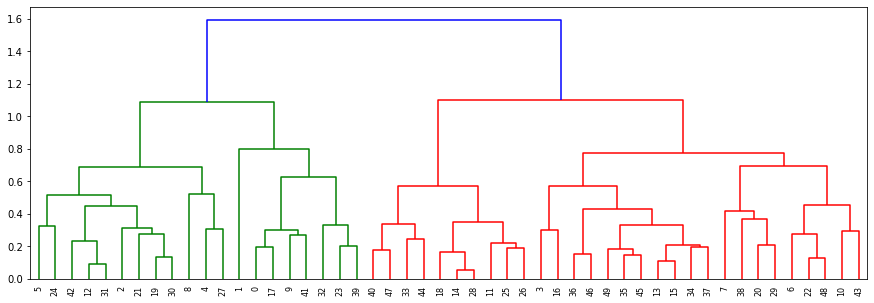

In [ ]:
plt.figure(figsize=(15,5))
dendogram = sch.dendrogram(sch.linkage(df_norm1,'complete'))

In [ ]:
hclusters=AgglomerativeClustering(n_clusters=6,affinity="euclidean",linkage="complete").fit(df_norm1)
hclusters

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [ ]:
H=pd.Series(hclusters.labels_)

In [ ]:
crime['clust']=H
crime=crime.iloc[:,[5,0,1,2,3,4]]

In [ ]:
crime.iloc[:,2:].groupby(crime.clust).median()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,3.4,120.0,80.0,15.80
1,11.2,254.5,80.0,31.45
2,2.4,82.0,52.0,11.25
3,14.4,249.0,58.0,22.20
4,10.0,263.0,48.0,44.50
5,6.8,145.0,66.0,20.00
